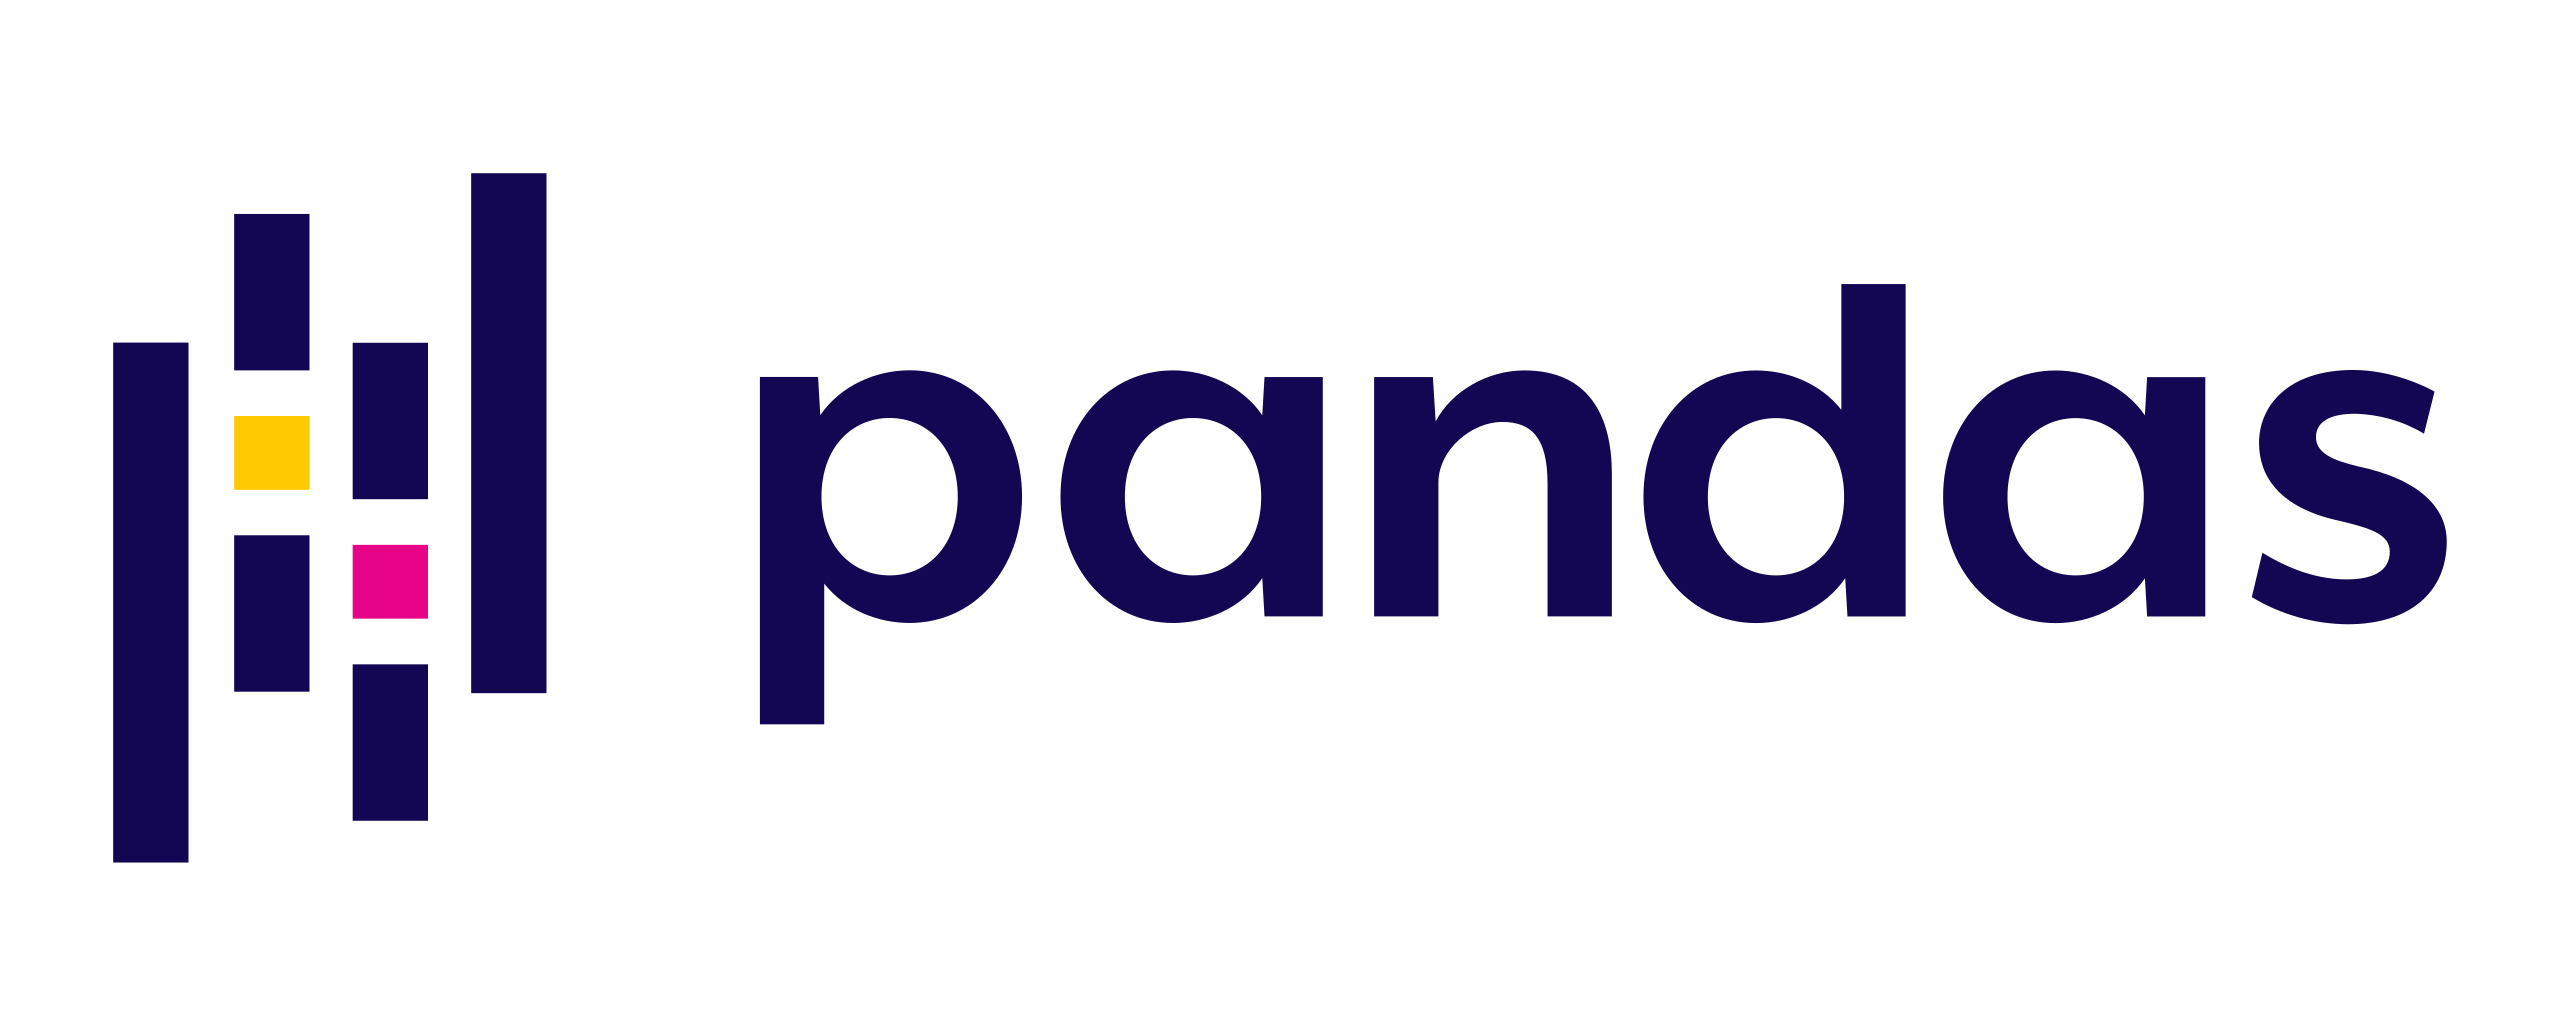

# Pandas For Engineers

**Attribution**: https://www.youtube.com/watch?v=2uvysYbKdjM&ab_channel=KeithGalli

## 0. Setup

In [3]:
import pandas as pd

## 1. Basics

In [4]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=["A","B","C"])

In [5]:
df.head()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [6]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [7]:
df.index.to_list()

[0, 1, 2]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


In [9]:
df.describe()

,A,B,C
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [10]:
df.nunique()

A    3
B    3
C    3
dtype: int64

In [11]:
df.shape

(3, 3)

In [12]:
df.size

9

## 3. Loading in DataFrames from external files

In [13]:
coffee_df = pd.read_csv('./data/coffee.csv')

It is important to see that a same dataset can be compressed in different formats, as an example:
- **results.csv**: 31.5 MB
- **results.feather**: 12.2 MB
- **results.parquet**: 4.74 MB

In [14]:
results_df_parquet = pd.read_parquet('./data/results.parquet')
results_df_feather = pd.read_feather('./data/results.feather')

In [15]:
olympics_df = pd.read_excel('./data/olympics-data.xlsx', sheet_name="results")
olympics_df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [16]:
bios_df = pd.read_csv('./data/bios.csv')

## 4. Data Access Methods in Pandas

In this section, we'll explore various ways to access data in pandas DataFrames:

1. **Basic indexing and slicing** for selecting rows (or samples):
    - `head()` - View first n rows
    - `tail()` - View last n rows
    - `sample()` - Get random samples

2. **Location-based access**:
    - `loc[]` - Label-based indexing
    - `iloc[]` - Integer position-based indexing

3. **Sorting data**:
    - Using `sort_values()` method

The **coffee dataset** we'll be working with contains daily sales data for different coffee types:

In [17]:
coffee_df

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


### 4.1 Basic indexing and slicing

The `head()` method allows you to view the first few rows of a DataFrame. This is particularly useful when working with large datasets to quickly inspect the structure and content without displaying the entire dataset.

In [18]:
coffee_df.head(10)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


The `tail()` method allows you to view the last few rows of a DataFrame. Similar to `head()`, this is useful when working with large datasets to quickly check the end of your data without displaying the entire dataset. By default, it shows the last 5 rows, but you can specify a different number as a parameter.

In [19]:
coffee_df.tail(10)

,Day,Coffee Type,Units Sold
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


The standard Python slicing notation can be used to select specific rows from a DataFrame. This approach allows you to view a subset of consecutive rows based on their integer position:

- `df[start:end]` returns rows from position `start` up to (but not including) position `end`
- This is a simple way to select a range of rows based on their position in the DataFrame
- Unlike `loc[]` which is label-based, or `iloc[]` which is explicitly position-based, this syntax is a shorthand for position-based row selection

This method is particularly useful when you want to quickly examine a specific section of your data without using more complex indexing methods.

In [20]:
coffee_df[5:10] #if we acces a single value, e.g. df[5] pandas will raise an error

,Day,Coffee Type,Units Sold
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [21]:
coffee_df["Day"] #because it is interpreted as a column label

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

The `sample()` method allows you to randomly select rows from a DataFrame. This is particularly useful for:

- Working with a smaller subset of a large dataset
- Creating training and test datasets for machine learning
- Performing statistical analysis on representative samples
- Inspecting random portions of your data to check for consistency

In [22]:
coffee_df.sample(2, random_state=42) #random

,Day,Coffee Type,Units Sold
9,Friday,Latte,35
11,Saturday,Latte,35


### 4.2 Location-based access

1. Using `loc` for label-based filtering with the bios dataset:
    - Suppose we want to view the names and birth dates of athletes born in France (born_country equals "FRA"). We can achieve this as follows:
    
    ```python
    bios_df.loc[bios_df["born_country"] == "FRA", ["name", "born_date"]].head()
    ```

2. Using `iloc` for position-based slicing with the coffee dataset:
    - For instance, to select the first three rows and the columns for "Coffee Type" and "Units Sold", you can use:
    
    ```python
    coffee_df.iloc[:3, [1, 2]]
    ```


In [23]:
coffee_df.loc[0] #first sample

Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object

In [24]:
coffee_df.loc[5:10]

,Day,Coffee Type,Units Sold
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35
10,Saturday,Espresso,45


In [25]:
coffee_df.loc[[1,2,3], ["Day", "Units Sold"]] #label based

,Day,Units Sold
1,Monday,15
2,Tuesday,30
3,Tuesday,20


In [26]:
coffee_df.iloc[[1,2,3], [0,1]] #index based

,Day,Coffee Type
1,Monday,Latte
2,Tuesday,Espresso
3,Tuesday,Latte


### 4.3 Sorting Data

The `sort_values()` method allows you to sort a DataFrame by one or more columns. This is particularly useful for:

- Identifying top or bottom performers in your data
- Organizing data in a logical order for analysis or presentation
- Finding patterns based on ordered values

In [27]:
coffee_df.sort_values(["Units Sold", "Coffee Type"], ascending=False)

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
4,Wednesday,Espresso,35
7,Thursday,Latte,30
2,Tuesday,Espresso,30


## 5. Modyfing Data

In [28]:
coffee_df.loc[1:3, "Units Sold"] = 10
coffee_df.set_index("Day")

,Coffee Type,Units Sold
Day,,
Monday,Espresso,25
Monday,Latte,10
Tuesday,Espresso,10
Tuesday,Latte,10
Wednesday,Espresso,35
Wednesday,Latte,25
Thursday,Espresso,40
Thursday,Latte,30
Friday,Espresso,45


In [29]:
coffee_df.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,10
2,Tuesday,Espresso,10
3,Tuesday,Latte,10
4,Wednesday,Espresso,35


In [30]:
coffee_df = pd.read_csv('./data/coffee.csv')

In [31]:
coffee_df.at[0, "Day"]

'Monday'

In [32]:
coffee_df.iat[0,0]

'Monday'

## 6. Filtering Data

In [33]:
bios_df[bios_df["born_country"] == "ESP"]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
289,290,Ángel Bello,1951-01-09,Vigo,Pontevedra,ESP,Argentina,NaN,NaN,2013-06-13
418,419,Teresa Fernández,1949-10-15,Oviedo,Asturias,ESP,Spain,NaN,NaN,NaN
419,420,Ascensión Guerra,1955-02-28,Madrid,Madrid,ESP,Spain,171.0,63.0,NaN
420,421,Montserrat Martín,1966-07-26,Montblanc,Tarragona,ESP,Spain,156.0,56.0,NaN
421,422,María Teresa Romero,1930-09-22,Madrid,Madrid,ESP,Spain,168.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
144567,148259,Núria Pau,1994-02-24,Ribes de Freser,Gerona,ESP,Spain,NaN,NaN,NaN
144568,148260,Adur Etxezarreta,1996-01-27,San Sebastián,Guipúzcoa,ESP,Spain,NaN,NaN,NaN
144569,148261,Jaume Pueyo,2001-10-12,Badalona,Barcelona,ESP,Spain,NaN,NaN,NaN
144570,148262,Javier Lliso,1997-08-18,Madrid,Madrid,ESP,Spain,NaN,NaN,NaN


In [34]:
bios_df.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [35]:
bios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [36]:
bios_df.loc[bios_df['height_cm'] > 215, ["name", "height_cm"]].head()

,name,height_cm
5089,Viktor Pankrashkin,220.0
5583,Paulinho Villas Boas,217.0
5673,Gunther Behnke,221.0
5716,Uwe Blab,218.0
5781,Tommy Burleson,223.0


In [37]:
bios_df.loc[(bios_df['height_cm'] > 215) & (bios_df["born_country"] == "USA"), "name"].head()

5781        Tommy Burleson
6722      Shaquille O'Neal
6937        David Robinson
123850      Tyson Chandler
Name: name, dtype: object

In [38]:
bios_df.loc[bios_df["name"].str.contains("keith", case=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1897,1907,Keith Hanlon,1966-09-01,NaN,NaN,NaN,Ireland,NaN,NaN,NaN
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31
6228,6255,Keith Hartley,1940-10-15,Vancouver,British Columbia,CAN,Canada,200.0,85.0,NaN
8898,8946,Keith Mwila,1966-01-01,NaN,NaN,NaN,Zambia,NaN,NaN,1993-01-09
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22
...,...,...,...,...,...,...,...,...,...,...
109900,111105,Keith Cumberpatch,1927-08-25,Christchurch,Canterbury,NZL,New Zealand,NaN,NaN,2013-11-15
115973,117348,Keith Sanderson,1975-02-02,Plymouth,Massachusetts,USA,United States,183.0,95.0,NaN
117676,119195,Duncan Keith,1983-07-16,Winnipeg,Manitoba,CAN,Canada,185.0,88.0,NaN
122121,124176,Keith Ferguson,1979-09-07,Sale,Victoria,AUS,Australia,176.0,78.0,NaN


In [39]:
bios_df.query("born_country == 'USA' and born_city == 'Seattle'")

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
11030,11088,David Halpern,1955-08-18,Seattle,Washington,USA,United States,178.0,79.0,NaN
12800,12870,Todd Trewin,1958-04-20,Seattle,Washington,USA,United States,180.0,75.0,NaN
15476,15583,Scott McKinley,1968-10-15,Seattle,Washington,USA,United States,183.0,75.0,NaN
29079,29293,Joyce Tanac,1950-09-27,Seattle,Washington,USA,United States,156.0,49.0,NaN
31135,31371,Bill Kuhlemeier,1908-01-14,Seattle,Washington,USA,United States,NaN,NaN,2001-07-08
...,...,...,...,...,...,...,...,...,...,...
133392,136331,Hans Struzyna,1989-03-31,Seattle,Washington,USA,United States,188.0,91.0,NaN
135448,138662,Maude Davis Crossland,2003-03-19,Seattle,Washington,USA,Colombia,NaN,NaN,NaN
136993,140229,Jenell Berhorst,2003-12-13,Seattle,Washington,USA,United States,NaN,NaN,NaN
143507,147159,Nevin Harrison,2002-06-02,Seattle,Washington,USA,United States,175.0,73.0,NaN


## 7. Adding/Removing Columns

In [40]:
coffee_df['price'] = 4.99
coffee_df

,Day,Coffee Type,Units Sold,price
0,Monday,Espresso,25,4.99
1,Monday,Latte,15,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


In [41]:
import numpy as np
coffee_df["new_price"] = np.where(coffee_df['Coffee Type']=='Espresso', 3.99, 5.99)

In [42]:
coffee_df

,Day,Coffee Type,Units Sold,price,new_price
0,Monday,Espresso,25,4.99,3.99
1,Monday,Latte,15,4.99,5.99
2,Tuesday,Espresso,30,4.99,3.99
3,Tuesday,Latte,20,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99


In [43]:
coffee_df.drop("price", axis=1, inplace=True) #will not modify the dataframe

In [44]:
coffee_df_new = coffee_df.copy() #if is not a copy we will be pointing at 'coffee_df'

In [45]:
coffee_df

,Day,Coffee Type,Units Sold,new_price
0,Monday,Espresso,25,3.99
1,Monday,Latte,15,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99


In [46]:
coffee_df["revenue"] = coffee_df["new_price"]*coffee_df["Units Sold"]

In [47]:
coffee_df

,Day,Coffee Type,Units Sold,new_price,revenue
0,Monday,Espresso,25,3.99,99.75
1,Monday,Latte,15,5.99,89.85
2,Tuesday,Espresso,30,3.99,119.70
3,Tuesday,Latte,20,5.99,119.80
4,Wednesday,Espresso,35,3.99,139.65
5,Wednesday,Latte,25,5.99,149.75
6,Thursday,Espresso,40,3.99,159.60
7,Thursday,Latte,30,5.99,179.70
8,Friday,Espresso,45,3.99,179.55
9,Friday,Latte,35,5.99,209.65


## 8. Handling Null Values

In [58]:
coffee_df.loc[[0,1], "Units Sold"] = np.nan
coffee_df

,Day,Coffee Type,Units Sold,new_price,revenue
0,Monday,Espresso,NaN,3.99,99.75
1,Monday,Latte,NaN,5.99,89.85
2,Tuesday,Espresso,30.0,3.99,119.70
3,Tuesday,Latte,20.0,5.99,119.80
4,Wednesday,Espresso,35.0,3.99,139.65
5,Wednesday,Latte,25.0,5.99,149.75
6,Thursday,Espresso,40.0,3.99,159.60
7,Thursday,Latte,30.0,5.99,179.70
8,Friday,Espresso,45.0,3.99,179.55
9,Friday,Latte,35.0,5.99,209.65


In [50]:
coffee_df.isna().sum()

Day            0
Coffee Type    0
Units Sold     2
new_price      0
revenue        0
dtype: int64

In [57]:
coffee_df = coffee_df.fillna(0)

In [53]:
coffee_df

,Day,Coffee Type,Units Sold,new_price,revenue
0,Monday,Espresso,0.0,3.99,99.75
1,Monday,Latte,0.0,5.99,89.85
2,Tuesday,Espresso,30.0,3.99,119.70
3,Tuesday,Latte,20.0,5.99,119.80
4,Wednesday,Espresso,35.0,3.99,139.65
5,Wednesday,Latte,25.0,5.99,149.75
6,Thursday,Espresso,40.0,3.99,159.60
7,Thursday,Latte,30.0,5.99,179.70
8,Friday,Espresso,45.0,3.99,179.55
9,Friday,Latte,35.0,5.99,209.65


In [59]:
coffee_df = coffee_df.dropna()

In [60]:
coffee_df

,Day,Coffee Type,Units Sold,new_price,revenue
2,Tuesday,Espresso,30.0,3.99,119.70
3,Tuesday,Latte,20.0,5.99,119.80
4,Wednesday,Espresso,35.0,3.99,139.65
5,Wednesday,Latte,25.0,5.99,149.75
6,Thursday,Espresso,40.0,3.99,159.60
7,Thursday,Latte,30.0,5.99,179.70
8,Friday,Espresso,45.0,3.99,179.55
9,Friday,Latte,35.0,5.99,209.65
10,Saturday,Espresso,45.0,3.99,179.55
11,Saturday,Latte,35.0,5.99,209.65
